In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML,Image
import seaborn as sns
import time 

%matplotlib inline
plt.style.use('seaborn-white')

# 算法流程

## 目标函数(object function)

$$
L(x)=\exp(x_1+3x_2-0.1)+\exp(x_1-3x_2-0.1)+\exp(-x_1-0.1)
$$

## 梯度计算 (compute gradient)

$$
\begin{align}
\frac{\partial L}{\partial x_1}&=\exp(x_1+3x_2-0.1)+\exp(x_1-3x_2-0.1)-\exp(-x_1-0.1) \\
\frac{\partial L}{\partial x_2}&=3\exp(x_1+3x_2-0.1)-3\exp(x_1-3x_2-0.1)
\end{align}
$$
## Hession matrix ($\nabla^2f(x)$)
$$
\begin{align}
\frac{\partial^2 L}{\partial x_1 \partial x_1}&=\exp(x_1+3x_2-0.1)+\exp(x_1-3x_2-0.1)+\exp(-x_1-0.1) \\
\frac{\partial^2 L}{\partial x_1 \partial x_2}&=3\exp(x_1+3x_2-0.1)-3\exp(x_1-3x_2-0.1) \\
\frac{\partial^2 L}{\partial x_2 \partial x_1}&=3\exp(x_1+3x_2-0.1)-3\exp(x_1-3x_2-0.1) \\
\frac{\partial^2 L}{\partial x_2 \partial x_2}&=9\exp(x_1+3x_2-0.1)+9\exp(x_1-3x_2-0.1) \\
\end{align}
$$

## 牛顿法 (Newton Method)
* given a start point $x \in dom L$
* repeat
    * compute gradient $\nabla L(x)$
    * compute newton direction $\Delta x_{nt}=-\nabla^2 L(x)^{-1}\nabla L(x)$
    * compute newton decrement $\lambda (x)=(\Delta x_{nt}^T\nabla^2 L(x) \Delta x_{nt})^{1/2}$
    * line search: choose learning rate $t$
    * update: $x:=x+t\Delta x_{nt}$
    
## 回溯直线搜索(line search)
* initialize $\alpha \in (0,0.5] $,$\beta \in [0,1]$,$t=1$
* while $L(x+t\Delta x_{sd})>L(x)+\alpha t\nabla L(x)^T\Delta x_{sd}$
    * $t:=\beta t$
* end

In [3]:
# object function
def L(x1,x2):
    return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

In [4]:
# compute gradient
def compute_grad(x1,x2):
    g1=np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)-np.exp(-x1-0.1)
    g2=3.0*np.exp(x1+3*x2-0.1)-3.0*np.exp(x1-3.0*x2-0.1)
    return np.array([g1,g2])

In [5]:
def Hessian(x1,x2):
    h_11=np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)
    h_12=3*np.exp(x1+3*x2-0.1)-3*np.exp(x1-3*x2-0.1)
    h_21=h_12
    h_22=9*np.exp(x1+3*x2-0.1)+9*np.exp(x1-3*x2-0.1)
    return np.array([[h_11,h_12],[h_21,h_22]])

In [6]:
# line search
def condition(x,delta,g,t,alpha):
    temp=x+t*delta
    left=L(temp[0],temp[1])
    right=L(x[0],x[1])+alpha*t*np.dot(g,delta)
    return left>right 

def linesearch(x,g,delta,beta,alpha):
    t=1
    while condition(x,delta,g,t,alpha):
        t=beta*t
    return t
    

In [7]:
# newton method with different parameter
def newton_method(x,beta,alpha,Loss_history,x_history,y_history):
    loss,step=0.0,0
    decrement=1
    eps=1e-8
    while (decrement/2>eps):
        # compute delta and decrement
        g=compute_grad(x[0],x[1])
        H=Hessian(x[0],x[1])
        H_1=np.linalg.inv(H)
        delta=-H_1.dot(g)
        decrement=(g.dot(H_1)).dot(g)
        lr=linesearch(x,g,delta,beta,alpha)
        # comupte loss
        loss=L(x[0],x[1])
        Loss_history.append(loss)
        print("第{}轮:Loss:{}".format(step,loss))
        step+=1 
        # update
        x+=lr*delta
        
        x_history.append(x[0])
        y_history.append(x[1])
        
        
    

In [20]:
# 初始值
x_0=np.array([-2.0,1.0])

In [21]:
# 初始化参数
alpha,beta=0.5,0.8


第0轮:Loss:9.151594300001733
第1轮:Loss:3.5108098694624488
第2轮:Loss:2.571211829697262
第3轮:Loss:2.559728937954584
第4轮:Loss:2.559285110722278
第5轮:Loss:2.559267432602447
第6轮:Loss:2.5592667260910007
第7轮:Loss:2.559266697835487
运行时间:0.005003929138183594sec(s)


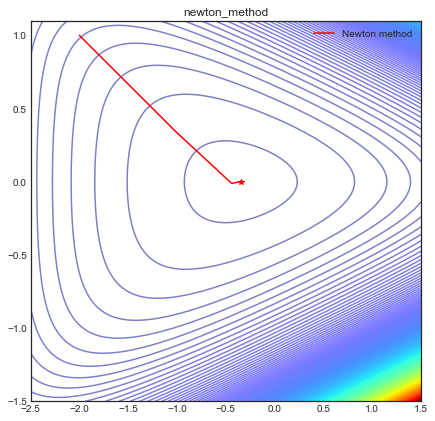

In [22]:
startTime=time.time()

x,y=np.linspace(-2.5,1.5,100),np.linspace(-1.5,1.1,100)
X,Y=np.meshgrid(x,y)
l=L(X,Y)

x_1=x_0.copy()
loss_1,a1_history,b1_history=[],[x_1[0]],[x_1[1]]
newton_method(x_1,beta,alpha,loss_1,a1_history,b1_history)
loss_1.append(L(x_1[0],x_1[1]))
print("运行时间:{}sec(s)".format(time.time()-startTime))
fig1,ax1=plt.subplots(figsize=(7,7))
ax1.contour(X,Y,l,250,cmap='jet',alpha=0.5)
ax1.plot(a1_history,b1_history,'red',label='Newton method',lw=1.5)
ax1.plot(a1_history[-1],b1_history[-1],'*',color='red',markersize=6)
plt.title("newton_method")
plt.legend()